In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16 
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from google.colab import drive
from keras.preprocessing import image
from keras.models import load_model

# Importation de Data


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

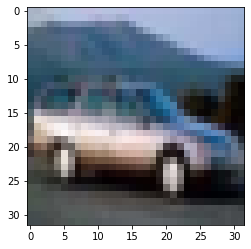

In [7]:
plt.imshow(x_train[4])

# Pretraitement des donées

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
max = x_train.max()

In [11]:
x_train = x_train/max

In [12]:
x_test = x_test/max

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

# Labels


In [15]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [16]:
y_train.shape

(50000, 1)

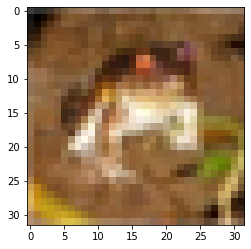

In [17]:
plt.imshow(x_train[0])

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
y_cat_train.shape

(50000, 10)

In [20]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [21]:
index = np.where(y_cat_train[0]==1.0)
print(classes[index[0][0]])

frog


In [22]:
y_cat_test = to_categorical(y_test,10)

# Construction du Modèle

In [23]:
model = Sequential()
model.add(VGG16(include_top=False,pooling='avg',weights='imagenet'))

58900480/58889256 [==============================] - 1s 0us/step


In [24]:
num_classes = 10
# Is going to be softmax because thid is a classification
model.add(Dense(num_classes,activation='softmax'))

In [25]:
model.layers[0].layers

In [26]:
model.layers[0].trainable = False
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
early_stop = EarlyStopping(monitor='val_acc', min_delta=0, patience=3, verbose=1, mode='auto')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 10)                5130      
                                                                 
Total params: 14,719,818
Trainable params: 5,130
Non-trainable params: 14,714,688
_________________________________________________________________


In [29]:
fit_history = model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 57s 31ms/step - loss: 1.5426 - accuracy: 0.4738 - val_loss: 1.3794 - val_accuracy: 0.5281
Epoch 2/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.3119 - accuracy: 0.5535 - val_loss: 1.3038 - val_accuracy: 0.5481
Epoch 3/15
1563/1563 [==============================] - 48s 30ms/step - loss: 1.2520 - accuracy: 0.5715 - val_loss: 1.2658 - val_accuracy: 0.5609
Epoch 4/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.2194 - accuracy: 0.5821 - val_loss: 1.2434 - val_accuracy: 0.5673
Epoch 5/15
1563/1563 [==============================] - 51s 32ms/step - loss: 1.1967 - accuracy: 0.5894 - val_loss: 1.2342 - val_accuracy: 0.5677
Epoch 6/15
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1811 - accuracy: 0.5947 - val_loss: 1.2268 - val_accuracy: 0.5745
Epoch 7/15
1563/1563 [==============================] - 48s 30ms/step - loss: 1.1697 - accuracy: 0.5978 - val_loss: 1.2135 -

# Evaluation du Model

In [30]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.542583,0.47378,1.379406,0.5281
1,1.311889,0.55348,1.303833,0.5481
2,1.251959,0.57148,1.265775,0.5609
3,1.219369,0.58214,1.243382,0.5673
4,1.196744,0.58944,1.234160,0.5677


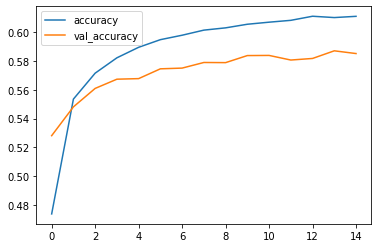

In [31]:
losses[['accuracy','val_accuracy']].plot()

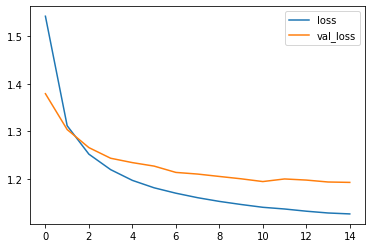

In [32]:
losses[['loss','val_loss']].plot()

In [33]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.1924914121627808, 0.585099995136261]


In [34]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

In [35]:
#test the predicted output
imageTest = 4
mx=predict_x[imageTest].max()
index2 = np.where(predict_x[imageTest]==mx)
print(classes[index2[0][0]])

frog


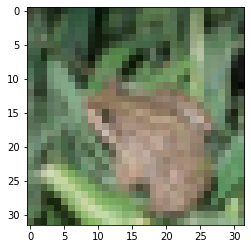

In [36]:
#see the real image
plt.imshow(x_test[imageTest])

In [37]:
#verify the labeling from the list
classes[y_test[imageTest][0]]

'frog'

In [38]:
print(classification_report(y_test,classes_x))


              precision    recall  f1-score   support

           0       0.62      0.69      0.65      1000
           1       0.65      0.63      0.64      1000
           2       0.52      0.46      0.49      1000
           3       0.43      0.41      0.42      1000
           4       0.59      0.47      0.52      1000
           5       0.55      0.48      0.51      1000
           6       0.58      0.70      0.64      1000
           7       0.65      0.65      0.65      1000
           8       0.70      0.69      0.69      1000
           9       0.54      0.68      0.60      1000

    accuracy                           0.59     10000
   macro avg       0.58      0.59      0.58     10000
weighted avg       0.58      0.59      0.58     10000



In [39]:
confusion_matrix(y_test,classes_x)

array([[691,  25,  57,  17,   7,  15,  12,  23, 100,  53],
       [ 43, 629,  17,  30,   7,  21,  25,  19,  38, 171],
       [ 95,  22, 456,  67, 100,  68, 103,  49,  16,  24],
       [ 29,  42,  76, 410,  43, 128, 127,  43,  28,  74],
       [ 29,  16,  82,  63, 474,  36, 133, 101,  37,  29],
       [ 19,  24,  58, 195,  52, 478,  52,  75,  10,  37],
       [ 11,  28,  58,  70,  49,  36, 703,   7,   8,  30],
       [ 32,  18,  49,  50,  52,  51,  22, 649,  12,  65],
       [110,  60,  10,  19,  16,   5,   7,   4, 685,  84],
       [ 52, 101,  14,  28,  10,  24,  20,  35,  40, 676]])

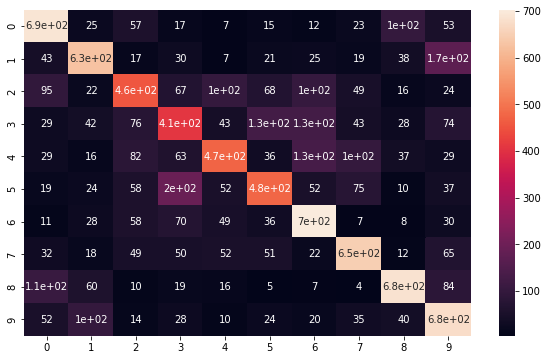

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,classes_x),annot=True)

# Sauvegarder le Model

In [41]:
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
model.save('/content/drive/MyDrive/Projet_VGG16_CIFAR-10/VGG16_CIFAR-10.h5')

# La Prediction des Nouveaux Images

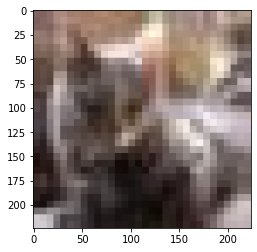

In [43]:

img = image.load_img("/content/drive/MyDrive/Projet_VGG16_CIFAR-10/cat.jpg",color_mode='rgb', target_size=(224, 224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

saved_model = load_model("/content/drive/MyDrive/Projet_VGG16_CIFAR-10/VGG16_CIFAR-10.h5")
output = saved_model.predict(img)



In [44]:
output[0]

array([9.9999905e-01, 7.0744501e-28, 2.5000342e-23, 8.9568312e-07,
       1.1973322e-13, 8.9347788e-16, 4.2717701e-17, 2.1151256e-11,
       5.7491165e-21, 6.8048700e-25], dtype=float32)

In [45]:
mx1=output[0].max()
index3 = np.where(output[0]==mx1)
print(classes[index3[0][0]])

airplane
